<a href="https://colab.research.google.com/github/PasanLahiru/black-pearl/blob/master/NN_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [32]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [34]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [35]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:

train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DataSet/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DataSet/test.csv')
print("Train - ",len(train_df),", Test - ",len(test_df))
train_df.columns

Train -  913000 , Test -  45000


Index(['date', 'store', 'item', 'sales'], dtype='object')

In [61]:
# train_df = train_df.dropna()
# test_df = test_df.dropna()
# print("Train - ",len(train_df),", Test - ",len(test_df))

train_df.head()
#test_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


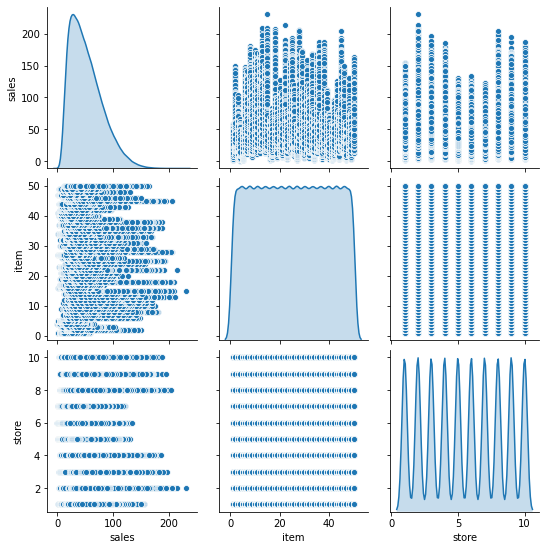

In [38]:
sns.pairplot(train_df[["sales", "item", "store"]], diag_kind="kde")

In [62]:
train_stats = train_df.describe()
train_stats.pop("sales")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.5,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.5,14.430878,1.0,13.0,25.5,38.0,50.0


In [40]:
train_labels = train_df.pop('sales')
# test_labels = test_df.pop('sales')

In [46]:
lstStore = train_df['store'].to_list()
lstItem = train_df['item'].to_list()
data_lst= []
for i in range(len(lstStore)):
  row = [lstStore[i],lstItem[i]]
  data_lst.append(row)

np_arr = np.asarray(data_lst)

In [56]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2,]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [57]:
# example_batch = normed_train_data[:10]
example_result = model.predict(np_arr)
example_result

array([[0.24904841],
       [0.24904841],
       [0.24904841],
       ...,
       [7.7085667 ],
       [7.7085676 ],
       [7.7085676 ]], dtype=float32)

In [58]:
EPOCHS = 100

history = model.fit(
  np_arr, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/100
22805/22825 [============================>.] - ETA: 0s - loss: 679.6934 - mae: 20.4106 - mse: 679.6934
Epoch: 0, loss:679.6809,  mae:20.4104,  mse:679.6809,  val_loss:608.7131,  val_mae:19.8767,  val_mse:608.7131,  
22825/22825 [==============================] - 24s 1ms/step - loss: 679.6809 - mae: 20.4104 - mse: 679.6809 - val_loss: 608.7131 - val_mae: 19.8767 - val_mse: 608.7131
Epoch 2/100
22825/22825 [==============================] - 24s 1ms/step - loss: 633.0202 - mae: 19.4861 - mse: 633.0202 - val_loss: 633.6011 - val_mae: 19.8124 - val_mse: 633.6011
Epoch 3/100
22825/22825 [==============================] - 24s 1ms/step - loss: 620.0245 - mae: 19.2282 - mse: 620.0245 - val_loss: 691.0206 - val_mae: 20.2782 - val_mse: 691.0206
Epoch 4/100
22825/22825 [==============================] - 24s 1ms/step - loss: 603.9163 - mae: 18.9568 - mse: 603.9163 - val_loss: 1048.0198 - val_mae: 24.0354 - val_mse: 1048.0198
Epoch 5/100
22825/22825 [==============================] - 24s

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,470.884949,16.523460,470.884949,24809.486328,139.198120,24809.486328,95
96,470.074249,16.511393,470.074249,22962.205078,131.978775,22962.205078,96
97,469.436310,16.495108,469.436310,24853.859375,138.871964,24853.859375,97
98,469.218750,16.493271,469.218750,21619.898438,127.544823,21619.898438,98
99,470.406311,16.516823,470.406311,24511.736328,137.417389,24511.736328,99
